# Initial Data Analysis

* What are the dimensions (number of rows and columns) of the data frame?
* What does each row represent?
    * Each row represents a different LinkedIn user
* What do the columns mean?
* Rename columns if necessary (e.g. no spaces, reasonable length, understandable)
* Examine the distribution (i.e., the range or type of values in the key columns of interest)
* If relevant visualize the data (e.g. plot a histogram, plot a line graph, etc.)
* What observations and questions do you have after exploring your data?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## LinkedIn Data

In [2]:
linkedin_df = pd.read_csv('../data/raw/linkedin_data_comm318.csv', encoding='latin-1')

In [3]:
linkedin_df.shape

(62709, 52)

In [4]:
linkedin_df.columns

Index(['Unnamed: 0', 'avg_n_pos_per_prev_tenure', 'avg_pos_len',
       'avg_prev_tenure_len', 'c_name', 'm_urn', 'n_pos', 'n_prev_tenures',
       'tenure_len', 'age', 'beauty', 'beauty_female', 'beauty_male', 'blur',
       'blur_gaussian', 'blur_motion', 'emo_anger', 'emo_disgust', 'emo_fear',
       'emo_happiness', 'emo_neutral', 'emo_sadness', 'emo_surprise',
       'ethnicity', 'face_quality', 'gender', 'glass', 'head_pitch',
       'head_roll', 'head_yaw', 'img', 'mouth_close', 'mouth_mask',
       'mouth_open', 'mouth_other', 'skin_acne', 'skin_dark_circle',
       'skin_health', 'skin_stain', 'smile', 'african', 'celtic_english',
       'east_asian', 'european', 'greek', 'hispanic', 'jewish', 'muslim',
       'nationality', 'nordic', 'south_asian', 'n_followers'],
      dtype='object')

In [5]:
linkedin_df.head()

,Unnamed: 0,avg_n_pos_per_prev_tenure,avg_pos_len,avg_prev_tenure_len,c_name,m_urn,n_pos,n_prev_tenures,tenure_len,age,...,east_asian,european,greek,hispanic,jewish,muslim,nationality,nordic,south_asian,n_followers
0,0,2.000000,457.0,1338.0,TD,urn:li:member:149435456,1,1,457.0,37,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
1,1,1.500000,212.0,897.5,Light Up The World (LUTW),urn:li:member:149435456,1,2,212.0,37,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
2,2,1.333333,243.0,669.0,Glacier,urn:li:member:149435456,1,3,243.0,37,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
3,3,1.250000,123.0,562.5,Sprout App,urn:li:member:149435456,1,4,123.0,37,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
4,4,1.200000,244.0,474.6,College Pro,urn:li:member:149435456,1,5,244.0,37,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420


### Column info

The columns include data on the LinkedIn work history and analysis of their photo (Age, Race, Gender, Attractiveness, Health, Emotionality) and name.

Demographics
* `age`, `gender`

Work history (How long s/he has been working at their company? What's the company's name? How many companies have they worked at? Etc.)
* `avg_n_pos_per_prev_tenure`, `avg_pos_len`, `avg_prev_tenure_len`, `c_name`, `n_pos`, `n_prev_tenures`, `tenure_len`

Beauty-related (Based on an online analysis of their profile picture, how 'beautiful' is the LinkedIn user, from a scale of 0-100?)
* `beauty`, `beauty_female`, `beauty_male`

Emotionality (Based on an online analysis of their profile picture, how much of each of these emotions do the Linkedin user display?)
* `emo_anger`, `emo_disgust`, `emo_fear`, `emo_happiness`, `emo_neutral`, `emo_sadness`, `emo_surprise`

Profile picture features/ratings (From the LinkedIn user's profile picture, are they wearing glasses? Do they have acne? Is the background blurred? Is their mouth open? Are they smiling? Etc.)
* `img`, `face_quality`, `glass`, `head_pitch`, `head_roll`, `head_yaw`, `mouth_close`, `mouth_mask`, `mouth_open`, `mouth_other`, `skin_acne`, `skin_dark_circle`, `skin_health`, `skin_stain`, `smile`, `blur`, `blur_gaussian`, `blur_motion`

Race-related (Based on the LinkedIn user's profile picture and last name, what race are they? What percentage East Asian or Hispanic are they? Etc.)
* `african`, `celtic_english`, `east_asian`, `european`, `greek`, `hispanic`, `jewish`, `muslim`, `nationality`, `nordic`, `south_asian`, `ethnicity`

LinkedIn-specific (What's their LinkedIn profile URL? How many followers do they have?)
* `m_urn`, `n_followers`

### Data Cleaning

In [6]:
linkedin_df = linkedin_df.drop(['Unnamed: 0', 'm_urn','beauty_female', 'tenure_len', 'skin_acne',
                                'beauty_male', 'blur_gaussian', 'n_prev_tenures',
                                'blur_motion', 'emo_anger', 'avg_prev_tenure_len',
                                'emo_disgust', 'emo_fear', 'emo_happiness', 'avg_n_pos_per_prev_tenure',
                                'emo_neutral', 'emo_sadness', 'emo_surprise',
                                'face_quality', 'glass', 'head_pitch', 'head_roll', 
                                'head_yaw', 'img', 'mouth_close', 'mouth_mask',
                                'mouth_open', 'mouth_other', 'skin_dark_circle',
                                'skin_health', 'skin_stain', 'african', 'celtic_english',
                                'east_asian', 'european', 'greek', 'hispanic', 'jewish',
                                'muslim', 'nationality', 'nordic', 'south_asian'], axis = 1)

In [25]:
#creating a binary variable for female and male
linkedin_df = linkedin_df.replace({'Female' : 1, 'Male' : 0})

In [8]:
#removing users younger than 18 since 18
linkedin_df = linkedin_df[linkedin_df['age']>=18]

In [9]:
#removing users who reported a negative position length
linkedin_df = linkedin_df[linkedin_df['avg_pos_len']>0]

In [ ]:
linkedin_df.sort_values(by='col1', ascending=False)

In [11]:
linkedin_df.rename({'avg_pos_len': 'avg_position_len',
                    'c_name': 'company_name', 
                    'n_pos': 'n_positions'}, axis = 1, inplace = True)
linkedin_df.head()

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers
0,457.0,TD,1,37,57.57,0.421,Asian,0,77.536,420
1,212.0,Light Up The World (LUTW),1,37,57.57,0.421,Asian,0,77.536,420
2,243.0,Glacier,1,37,57.57,0.421,Asian,0,77.536,420
3,123.0,Sprout App,1,37,57.57,0.421,Asian,0,77.536,420
4,244.0,College Pro,1,37,57.57,0.421,Asian,0,77.536,420


In [12]:
linkedin_df.shape

(61816, 10)

In [13]:
linkedin_df.to_csv('../data/clean/linkedin_original.csv', index=False)

I dropped 42 columns, leaving 10 remaining columns. I dropped 11 columns relating to ethnicity (african, celtic_english, east_asian, european, greek, hispanic, jewish, muslim, nationality, nordic, south_asian) due to redundancy. I won't be looking into the impacts of what percentage of an ethnicity a LinkedIn user is but, rather, the impacts of ethnicity as a whole, and for that, all I need is the "Ethnicity" column, which I've kept.

7 columns relating to emotion (emo_anger, emo_disgust, emo_fear, emo_happiness, emo_neutral, emo_sadness, emo_surprise) were also dropped because I've deemed them irrelevant to my analysis. I also dropped 10 columns relating to facial features/actions (face_quality, head_pitch, head_roll, head_yaw, mouth_close, mouth_mask, mouth_open, mouth_other, skin_acne, skin_dark_circle) because I'll be testing the overall aspects of how a LinkedIn user's facial features make an impact simply through the "Beauty" column.

The last 9 columns that I dropped were either due to redundancy or irrelevance. I also renamed the remaining columns for clarity.

### Examining distribution

In [14]:
print("Average position length ranges from", linkedin_df['avg_position_len'].min(), 
      'to', linkedin_df['avg_position_len'].max())

Average position length ranges from 7.75 to 21884.0


In [15]:
print("Beauty ranges from", linkedin_df['beauty'].min(), 
      'to', linkedin_df['beauty'].max())

Beauty ranges from 18.402 to 92.431


In [16]:
print("The level of blur in the background of users' profile pictures ranges from", linkedin_df['blur'].min(), 
      'to', linkedin_df['blur'].max())

The level of blur in the background of users' profile pictures ranges from 0.002 to 100.0


In [17]:
print("The level of smiling from users' profile pictures ranges from", linkedin_df['smile'].min(), 
      'to', linkedin_df['smile'].max())

The level of smiling from users' profile pictures ranges from 0.032 to 99.92399999999999


In [18]:
print("The number of followers users have ranges from", linkedin_df['n_followers'].min(), 
      'to', linkedin_df['n_followers'].max())

The number of followers users have ranges from 0 to 530566


In [19]:
print('There are', 
      len(list(linkedin_df['ethnicity'].unique())), 
      'unique ethnicities in this dataset, and they are',
      list(linkedin_df['ethnicity'].unique())[0],',',
      list(linkedin_df['ethnicity'].unique())[1],
      ', and',
      list(linkedin_df['ethnicity'].unique())[2])

There are 3 unique ethnicities in this dataset, and they are Asian , White , and Black


In [20]:
print((linkedin_df['ethnicity']=='White').sum()/len(linkedin_df))
print((linkedin_df['ethnicity']=='Asian').sum()/len(linkedin_df))
print((linkedin_df['ethnicity']=='Black').sum()/len(linkedin_df))

0.7666299987058367
0.15533195289245502
0.07803804840170829


White LinkedIn users make up 76.7% of the data, Asian users make up 15.53%, and Black users make up 7.8%.

In [21]:
print('There are',len(linkedin_df['company_name'].unique()), 'unique companies in this dataset')

There are 29717 unique companies in this dataset


In [22]:
print((linkedin_df['gender']==0).sum()/len(linkedin_df))
print((linkedin_df['gender']==1).sum()/len(linkedin_df))

0.7637504853112462
0.23624951468875371


Male users make up 76.38% of the data, and females make up 23.62%

### Basic visualization

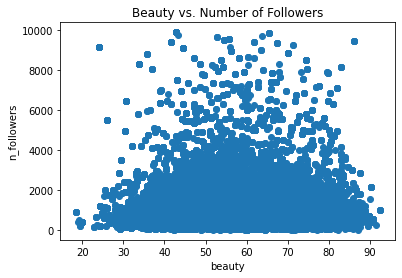

In [23]:
linkedin_df = linkedin_df[linkedin_df['n_followers'] != 0]
linkedin_df = linkedin_df[linkedin_df['n_followers'] <10000] 
#removing the outliers and those with 0 followers (likely to be fake/unused accounts) to eliminate noise in data

plt.scatter(linkedin_df['beauty'], linkedin_df['n_followers'])
plt.xlabel('beauty')
plt.ylabel('n_followers')
plt.title('Beauty vs. Number of Followers');

The scatter plot above represents the relationship between LinkedIn User's beauty and their number of followers. This is interesting to me because I'm curious as to whether a higher beauty score will result in a higher number of followers and, ultimately, result in better job prospects. However, there doesn't seem to be a strong correlation between the two variables based on the scatter plot.

### Observations and Questions

I've noticed that the data is not as diverse as I expected it to be, in terms of racial diversity. White and male LinkedIn users make up the majority of the data. This may be due to the relative racial homogeneity of Australia, which is where the LinkedIn users are based, compared to the US. This won't deter my analysis because the dataset is very large and I'll only be examining a few race- or gender- related questions.

Some of the questions I seek to explore are: 
* Does beauty influence one's chances of working at a Fortune 500 company?
* Does a LinkedIn profile picture influence working at a Fortune 500 company?
* Are certain ethnicities more likely to be work at a Fortune 500 company?
* Is there a leadership gap between men and women and among ethnicities?
* Because of maternity leaves, are women more likely to have shorter position lengths?
* Given the idea of millenials as a job-hopping generation, do millenials actually hold more positions than others?